In [2]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad

In [3]:
start = 0
finish = 3
step = 0.01

# ЗАДАНИЕ 1

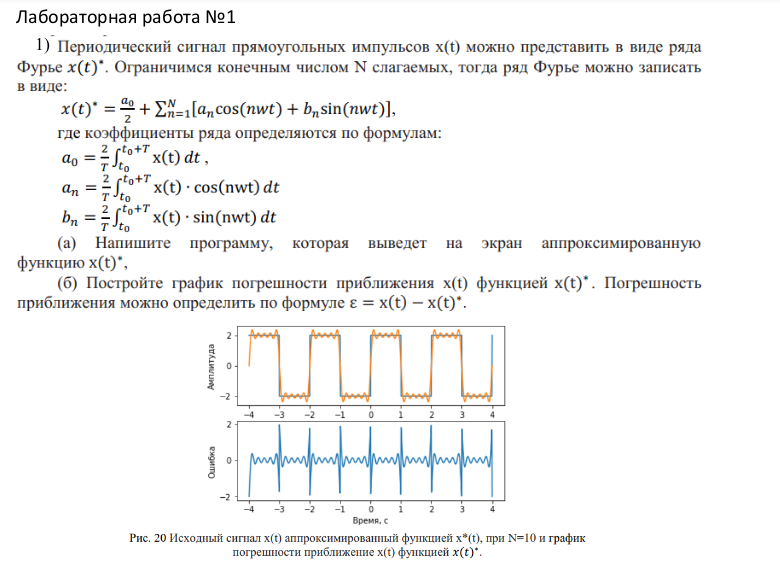

In [4]:
def b_n(myFunction, n, w, t0, T):
    integral = lambda t: myFunction(t) * np.sin(n * w * t)
    res = quad(integral, t0, t0 + T)[0]
    return 2/T * res 

def a_n(myFunction, n, w, t0, T):
    integral = lambda t: myFunction(t) * np.cos(n * w * t)
    res = quad(integral, t0, t0 + T)[0]
    return 2/T * res 

def calculate_furie(t, myFunction, w, T, t0, N):
    a0 = a_n(myFunction, 0, w, t0, T)
    An = np.array([a_n(myFunction, n, w, t0, T) * np.cos(n * w * t) for n in range(1, N)])
    Bn = np.array([b_n(myFunction, n, w, t0, T) * np.sin(n * w * t) for n in range(1, N)])
    sigma = An.sum() + Bn.sum()
    return a0/2 + sigma

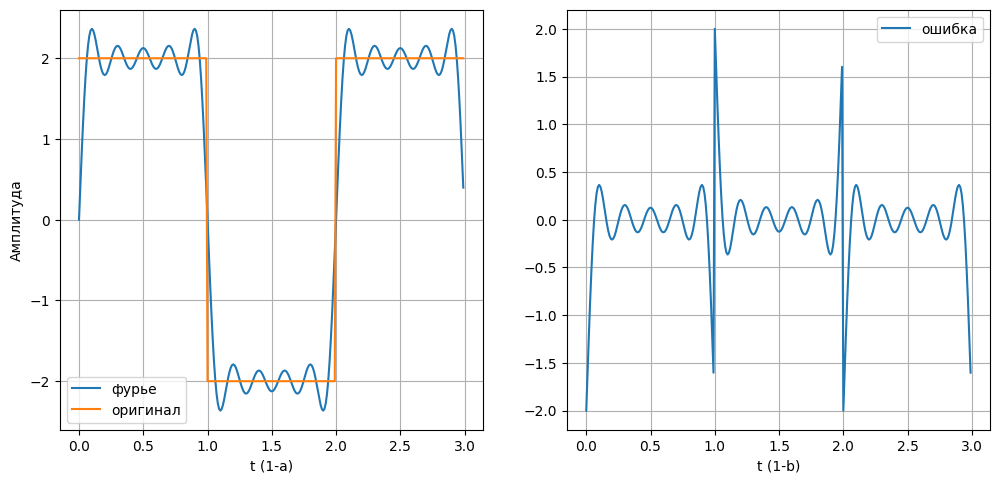

In [5]:
def x1(t):
    t_f = np.floor(t)
    if t_f % 2 == 0:
        return 2
    else:
        return -2

N = 10
T = 2
w = 2 * np.pi / T
t0 = 0

list_point = []
time_series = np.arange(start, finish, step)
for t in time_series:
    list_point.append(calculate_furie(t, x1, w, T, t0, N))

origin_signal = np.array([x1(t) for t in time_series])

fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(221)
plt.plot(time_series, list_point, label='фурье')
plt.plot(time_series, origin_signal, label='оригинал')
plt.xlabel('t (1-a)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

error = list_point - origin_signal
plt.subplot(222)
plt.plot(time_series, error, label='ошибка')
plt.xlabel('t (1-b)')
plt.grid()
plt.legend()

# ЗАДАНИЕ 2

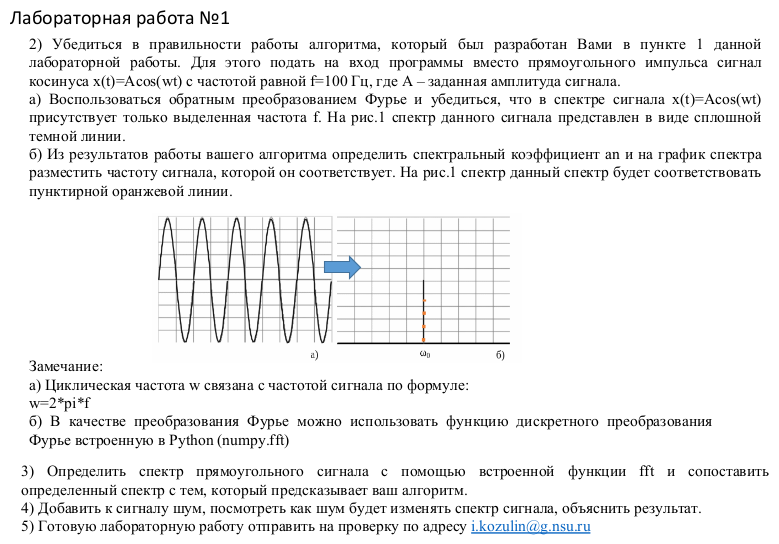

2

C:\Users\emely\AppData\Local\Temp\ipykernel_13076\4179914199.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res = quad(integral, t0, t0 + T)[0]
C:\Users\emely\AppData\Local\Temp\ipykernel_13076\4179914199.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res = quad(integral, t0, t0 + T)[0]


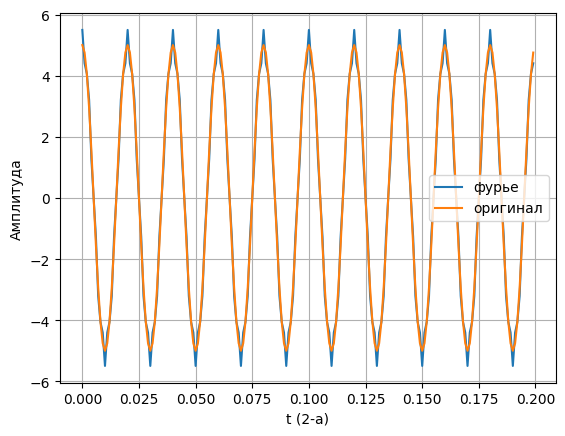

In [28]:
def x2(A, w):
    return lambda t: np.cos(t * w) * A

A = 5
w = 100 * np.pi
start = 0
finish = 0.2
step = 0.001

main_function = x2(A, w)

list_point = []
time_series = np.arange(start, finish, step)
for t in time_series:
    list_point.append(calculate_furie(t, main_function, w, T, t0, N))

origin_signal = np.array([main_function(t) for t in time_series])

plt.plot(time_series, list_point, label='фурье')
plt.plot(time_series, origin_signal, label='оригинал')
plt.xlabel('t (2)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()